# Metrolinx Data Analysis

## Import Libraries

In [0]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Read Data Files into DataFrames

### Data File 1: Daily Train Boardings by Hour

* Read Excel file
* Replace NaN with zeros
* Apply a correction factor to handle fractional boardings (due to data alterations at source for confidentiality)
* Convert float columns to integer
* Add daily_total column for sum of hourly columns
* Add year_month and week columns to facilitate data aggregation

#### Read Excel File

[link to Excel file](https://github.com/Jenarth/SCS3250-Group-2-Final-Project/blob/master/GO%20Train%20Boardings_2017-2020.xlsx)

In [0]:
# Load data from Excel file into Pandas DataFrame:
#path = '/content/drive/My Drive/Colab Notebooks/3250 Data Science/Final Project/Group2_FinalProject/GO Train Boardings_2017-2020.xlsx'
path = 'https://github.com/Jenarth/SCS3250-Group-2-Final-Project/blob/master/GO%20Train%20Boardings_2017-2020.xlsx?raw=true'
# or replace 'blob' with raw and remove '?...'
boardings = pd.read_excel(path, 
                          skiprows=1, # skip blank first row
                          usecols=[i for i in range(26)], # no data beyond column 25 (26th column)
                          parse_dates=[1]) # dates in column 1 (2nd column)

# List columns:
boardings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69094 entries, 0 to 69093
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Origin  69094 non-null  object        
 1   Date    69094 non-null  datetime64[ns]
 2   12AM    27381 non-null  float64       
 3   1AM     14521 non-null  float64       
 4   2AM     4294 non-null   float64       
 5   3AM     2535 non-null   float64       
 6   4AM     12866 non-null  float64       
 7   5AM     46922 non-null  float64       
 8   6AM     59113 non-null  float64       
 9   7AM     61954 non-null  float64       
 10  8AM     63100 non-null  float64       
 11  9AM     63702 non-null  float64       
 12  10AM    58368 non-null  float64       
 13  11AM    57093 non-null  float64       
 14  12PM    55188 non-null  float64       
 15  1PM     55418 non-null  float64       
 16  2PM     54763 non-null  float64       
 17  3PM     58323 non-null  float64       
 18  4PM   

In [0]:
# View basic stats:
# !!! Note fractional boarding times!
boardings.describe()

,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM
count,27381.000000,14521.000000,4294.000000,2535.000000,12866.000000,46922.000000,59113.000000,61954.000000,63100.000000,63702.000000,58368.000000,57093.000000,55188.000000,55418.000000,54763.000000,58323.000000,60503.000000,63552.000000,62650.000000,58958.000000,52024.000000,43032.000000,39708.000000,35913.000000
mean,3.051061,0.786386,0.541258,0.330018,1.483531,9.084917,37.388391,72.269468,38.386135,8.244689,6.734423,6.789881,7.316999,8.059810,10.317160,24.559933,60.281879,56.580424,19.886597,9.377002,6.302798,6.717044,6.739661,5.451131
std,14.819209,3.602854,1.735118,0.972161,3.174297,10.524733,38.587522,78.294051,45.997446,10.511455,9.804487,13.375282,21.866913,29.967103,47.773934,162.297778,465.805895,443.642606,134.127596,55.504257,32.146693,31.748613,34.082614,28.462944
min,-0.270000,-0.405000,-0.270000,0.000000,0.000000,0.000000,0.000000,-1.620000,-49.815000,-12.285000,-2.160000,-0.945000,-0.405000,-0.270000,-1.350000,-0.810000,-0.540000,-0.270000,-8.910000,-0.810000,-0.270000,-0.405000,-0.270000,-0.270000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.215000,6.345000,6.750000,3.780000,0.540000,0.675000,0.540000,0.405000,0.405000,0.405000,0.540000,0.675000,0.675000,0.540000,0.270000,0.000000,0.270000,0.270000,0.000000
50%,0.270000,0.000000,0.000000,0.000000,0.270000,5.265000,23.625000,41.445000,24.300000,4.050000,3.375000,2.835000,2.565000,2.295000,2.565000,2.835000,2.700000,2.295000,1.485000,0.945000,0.810000,1.215000,0.945000,0.540000
75%,0.540000,0.270000,0.405000,0.405000,0.945000,14.445000,55.215000,125.685000,53.325000,12.555000,9.180000,8.370000,7.695000,7.155000,7.020000,8.775000,10.800000,11.070000,6.480000,3.645000,2.970000,2.835000,2.025000,1.080000
max,547.965000,122.850000,58.050000,26.190000,24.300000,72.090000,203.850000,404.460000,367.605000,156.330000,115.560000,268.110000,873.585000,1342.710000,2432.025000,3805.380000,5229.765000,4945.995000,1673.325000,926.505000,436.590000,464.670000,566.865000,679.185000


In [0]:
# Determine date range:
# !!! Covers all 1096 days (365*3 + leap day) between 2017-03-01 and 2020-02-29.
boardings.Date.describe()

count                   69094
unique                   1096
top       2019-04-02 00:00:00
freq                       68
first     2017-03-01 00:00:00
last      2020-02-29 00:00:00
Name: Date, dtype: object

#### Replace NaN with zeros

In [0]:
# Replace NaNs with zeros:
boardings.fillna(value=0, inplace=True)
boardings.head()

,Origin,Date,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM
0,Acton GO,2017-03-01,0.0,0.0,0.0,0.0,0.0,0.27,6.885,5.265,0.0,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1,Acton GO,2017-03-02,0.0,0.0,0.0,0.0,0.0,0.00,6.615,3.645,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.27,0.0,0.0,0.0,0.0,0.0
2,Acton GO,2017-03-03,0.0,0.0,0.0,0.0,0.0,0.27,5.400,4.050,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27,0.00,0.0,0.0,0.0,0.0,0.0
3,Acton GO,2017-03-04,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,Acton GO,2017-03-05,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


#### Apply a correction factor to handle fractional boardings

In [0]:
# Print out all column names (as input to creating a named list):
boardings.columns

Index(['Origin', 'Date', '12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM',
       '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM',
       '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM'],
      dtype='object')

In [0]:
# Create a named list of just the hourly columns:
time_column_list = ['12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM',
       '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM',
       '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM']

print(len(time_column_list),'columns')

24 columns


In [0]:
# Confirm list has all hourly colums:
boardings[time_column_list].head()

,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM
0,0.0,0.0,0.0,0.0,0.0,0.27,6.885,5.265,0.0,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00,6.615,3.645,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.27,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.27,5.400,4.050,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.27,0.00,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [0]:
# Apply corrective factor to shift all values (manipulated at source for confidentiality) to whole numbers:
boardings[time_column_list]=boardings[time_column_list]/.135
boardings.head()

,Origin,Date,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM
0,Acton GO,2017-03-01,0.0,0.0,0.0,0.0,0.0,2.0,51.0,39.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Acton GO,2017-03-02,0.0,0.0,0.0,0.0,0.0,0.0,49.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,Acton GO,2017-03-03,0.0,0.0,0.0,0.0,0.0,2.0,40.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Acton GO,2017-03-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Acton GO,2017-03-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Convert float columns to integer

In [0]:
# Convert float columns to int (boardings can't be fractional):
boardings[time_column_list] = boardings[time_column_list].astype(int)
boardings.head()

,Origin,Date,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM
0,Acton GO,2017-03-01,0,0,0,0,0,2,51,39,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acton GO,2017-03-02,0,0,0,0,0,0,48,26,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2,Acton GO,2017-03-03,0,0,0,0,0,2,40,29,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,Acton GO,2017-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Acton GO,2017-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


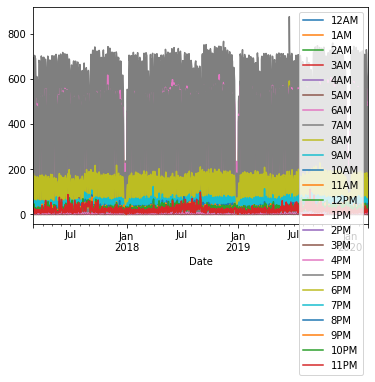

In [0]:
boardings.groupby(['Date']).mean().plot()

#### Add daily_total column for sum of hourly columns

In [0]:
#Add new column for daily totals:
boardings['daily_total'] = boardings[time_column_list].agg('sum', axis='columns')
boardings.head()

,Origin,Date,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,daily_total
0,Acton GO,2017-03-01,0,0,0,0,0,2,51,39,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94
1,Acton GO,2017-03-02,0,0,0,0,0,0,48,26,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,76
2,Acton GO,2017-03-03,0,0,0,0,0,2,40,29,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,73
3,Acton GO,2017-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Acton GO,2017-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


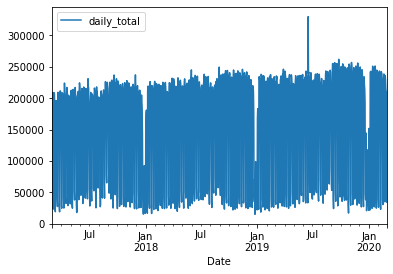

In [0]:
boardings[['Date', 'daily_total']].groupby(by='Date').sum().plot()

In [0]:
boardings.head(25)

,Origin,Date,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,daily_total
0,Acton GO,2017-03-01,0,0,0,0,0,2,51,39,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94
1,Acton GO,2017-03-02,0,0,0,0,0,0,48,26,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,76
2,Acton GO,2017-03-03,0,0,0,0,0,2,40,29,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,73
3,Acton GO,2017-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Acton GO,2017-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Acton GO,2017-03-06,0,0,0,0,0,3,46,41,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,93
6,Acton GO,2017-03-07,0,0,0,0,0,3,50,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87
7,Acton GO,2017-03-08,0,0,0,0,0,4,51,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93
8,Acton GO,2017-03-09,0,0,0,0,0,4,52,37,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,95
9,Acton GO,2017-03-10,0,0,0,0,0,2,32,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76


#### Add year_month and week columns to facilitate data aggregation

In [0]:
# Preview monthly periods:
boardings['Date'].dt.to_period('M').head()

0    2017-03
1    2017-03
2    2017-03
3    2017-03
4    2017-03
Name: Date, dtype: period[M]

In [0]:
# Add a year-month column for monthly summaries:
boardings['year_month'] = boardings['Date'].dt.to_period('M')
boardings.head()

,Origin,Date,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,daily_total,year_month
0,Acton GO,2017-03-01,0,0,0,0,0,2,51,39,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94,2017-03
1,Acton GO,2017-03-02,0,0,0,0,0,0,48,26,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,76,2017-03
2,Acton GO,2017-03-03,0,0,0,0,0,2,40,29,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,73,2017-03
3,Acton GO,2017-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-03
4,Acton GO,2017-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-03


In [0]:
# Preview weekly periods:
boardings['Date'].dt.to_period('W').head()

0    2017-02-27/2017-03-05
1    2017-02-27/2017-03-05
2    2017-02-27/2017-03-05
3    2017-02-27/2017-03-05
4    2017-02-27/2017-03-05
Name: Date, dtype: period[W-SUN]

In [0]:
# Add a week column for monthly summaries:
boardings['week'] = boardings['Date'].dt.to_period('W')
boardings.head()

,Origin,Date,12AM,1AM,2AM,3AM,4AM,5AM,6AM,7AM,8AM,9AM,10AM,11AM,12PM,1PM,2PM,3PM,4PM,5PM,6PM,7PM,8PM,9PM,10PM,11PM,daily_total,year_month,week
0,Acton GO,2017-03-01,0,0,0,0,0,2,51,39,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,94,2017-03,2017-02-27/2017-03-05
1,Acton GO,2017-03-02,0,0,0,0,0,0,48,26,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,76,2017-03,2017-02-27/2017-03-05
2,Acton GO,2017-03-03,0,0,0,0,0,2,40,29,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,73,2017-03,2017-02-27/2017-03-05
3,Acton GO,2017-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-03,2017-02-27/2017-03-05
4,Acton GO,2017-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2017-03,2017-02-27/2017-03-05


#### Create an aggregated daily_boardings DataFrame

In [19]:
daily_boardings = boardings[['Origin', 'Date', 'daily_total']]
daily_boardings

,Origin,Date,daily_total
0,Acton GO,2017-03-01,94
1,Acton GO,2017-03-02,76
2,Acton GO,2017-03-03,73
3,Acton GO,2017-03-04,0
4,Acton GO,2017-03-05,0
...,...,...,...
69089,York University GO,2020-02-24,275
69090,York University GO,2020-02-25,287
69091,York University GO,2020-02-26,269
69092,York University GO,2020-02-27,264


### Data File 2: Access Points (Bus Stop and Train Station Details)

In [0]:
path = 'https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/GO%20Access%20Points.csv'
access_points = pd.read_csv(path, sep=',')
access_points

,station name,Station Name Trimmed,Clean Stop Name,Line ID,Line Name,Station ID,stop_lat,stop_lon,rail_distance_from_union_miles,Subway,University_College,University_Nm,GO Station_Line,Park and Ride_Carpool,Terminal Station,Shopping Centre,Parent Station,City
0,1| 55|Union Station Rail,Union Station Rail,Union Station,0,Union Station,0,43.645195,-79.380600,0.00,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Union Station Rail,Toronto
1,1| 1|Agincourt GO Station Rail,Agincourt GO Station Rail,Agincourt GO,6,Stouffville,6002,43.786110,-79.284385,14.10,0.0,0.0,NaN,6.0,0.0,0.0,0.0,Agincourt GO Station Rail,Scarborough
2,1| 2|Ajax GO Station Rail,Ajax GO Station Rail,Ajax GO,7,Lakeshore East,7007,43.847766,-79.041372,23.43,0.0,0.0,NaN,7.0,0.0,0.0,0.0,Ajax GO Station Rail,Ajax
3,1| 3|Aldershot GO Station Rail,Aldershot GO Station Rail,Aldershot GO,1,Lakeshore West,1010,43.313385,-79.855659,34.60,0.0,0.0,NaN,1.0,0.0,0.0,0.0,Aldershot GO Station Rail,Burlington
4,1| 4|Appleby GO Station Rail,Appleby GO Station Rail,Appleby GO,1,Lakeshore West,1008,43.379429,-79.760991,27.90,0.0,0.0,NaN,1.0,0.0,0.0,0.0,Appleby GO Station Rail,Burlington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,1| 2954|Brampton - BramaleaGOStation At Steeles,Brampton - BramaleaGOStation At Steeles,Bramalea GO Bus,8,GO Bus,80454,43.702150,-79.689512,NaN,0.0,0.0,NaN,3.0,1.0,0.0,0.0,Bramalea GO Station Rail,Bramalea
973,1| 922|Toronto - McCowanRd At ProgressAve,Toronto - McCowanRd At ProgressAve,Toronto - McCowanRd At ProgressAve,8,GO Bus,80899,NaN,NaN,NaN,0.0,0.0,NaN,-1.0,0.0,0.0,0.0,NaN,Toronto
974,1| 2884|Oshawa- Simcoe St At Britannia Ave,Oshawa- Simcoe St At Britannia Ave,Oshawa- Simcoe St At Britannia Ave,8,GO Bus,80900,NaN,NaN,NaN,0.0,0.0,NaN,-1.0,0.0,0.0,0.0,NaN,Oshawa
975,1| 2885|Oshawa- Simcoe St At Britannia Ave,Oshawa- Simcoe St At Britannia Ave,Oshawa- Simcoe St At Britannia Ave,8,GO Bus,80901,NaN,NaN,NaN,0.0,0.0,NaN,-1.0,0.0,0.0,0.0,NaN,Oshawa


#### Select Required Rows and Columns from Access Points Data to Create 'go_stations' DataFrame

* Filter access points for GO Train stations (exclude GO Bus stops).
* Select required columns: 
 * Clean Stop Name
 * Line ID
 * Line Name

In [0]:
access_points['Clean Stop Name'].value_counts()

Zone 32                        13
Zone 20                        12
Zone 22                        12
Zone 60                        12
Zone 31                        12
                               ..
Cannington Zone 54              1
Innisfil Zone 67                1
Bramalea Rd. @ Balmoral Dr.     1
Streetsville GO Bus             1
Simcoe St. @ Mara Rd.           1
Name: Clean Stop Name, Length: 591, dtype: int64

Create a new go_stations dataframe with only required columns and only GO Train stations.(Remove bus stops.)

In [22]:
go_stations = access_points.loc[
                                access_points['Clean Stop Name'].str.endswith('GO'),
                                'Clean Stop Name':'Line Name'
                                ]
go_stations

,Clean Stop Name,Line ID,Line Name
1,Agincourt GO,6,Stouffville
2,Ajax GO,7,Lakeshore East
3,Aldershot GO,1,Lakeshore West
4,Appleby GO,1,Lakeshore West
5,Aurora GO,4,Barrie
...,...,...,...
63,Acton GO,3,Kitchener
64,Allandale Waterfront GO,4,Barrie
65,West Harbour GO,1,Lakeshore West
66,Gormley GO,5,Richmond Hill


### Data File(s) 3: Weather

#### Read, Concatenate csv Files

In [0]:
# Set up path variables with explicit file names
path2017 = 'https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Weather%20Data/en_climate_daily_ON_6158355_2017_P1D.csv'
path2018 = 'https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Weather%20Data/en_climate_daily_ON_6158355_2018_P1D.csv'
path2019 = 'https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Weather%20Data/en_climate_daily_ON_6158355_2019_P1D.csv'
path2020 = 'https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Weather%20Data/en_climate_daily_ON_6158355_2020_P1D.csv'

# Load each file into a Pandas DataFrame:
weather2017 = pd.read_csv(path2017, parse_dates=[4]) # dates in column 4 (5th column)
weather2018 = pd.read_csv(path2018, parse_dates=[4]) # dates in column 4 (5th column)
weather2019 = pd.read_csv(path2019, parse_dates=[4]) # dates in column 4 (5th column)
weather2020 = pd.read_csv(path2020, parse_dates=[4]) # dates in column 4 (5th column)

# Concatenate all records into a single DataFrame:
weather = pd.concat([weather2017, weather2018, weather2019, weather2020])

weather

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2017-01-01,2017,1,1,NaN,3.1,NaN,-0.5,NaN,1.3,NaN,16.7,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
1,-79.4,43.67,TORONTO CITY,6158355,2017-01-02,2017,1,2,NaN,5.5,NaN,0.7,NaN,3.1,NaN,14.9,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,3.0,NaN,NaN,M,NaN,M
2,-79.4,43.67,TORONTO CITY,6158355,2017-01-03,2017,1,3,NaN,4.8,NaN,2.4,NaN,3.6,NaN,14.4,NaN,0.0,NaN,NaN,M,NaN,M,11.3,NaN,1.0,NaN,NaN,M,NaN,M
3,-79.4,43.67,TORONTO CITY,6158355,2017-01-04,2017,1,4,NaN,3.8,NaN,-7.6,NaN,-1.9,NaN,19.9,NaN,0.0,NaN,NaN,M,NaN,M,0.6,NaN,NaN,NaN,NaN,M,NaN,M
4,-79.4,43.67,TORONTO CITY,6158355,2017-01-05,2017,1,5,NaN,-5.3,NaN,-10.3,NaN,-7.8,NaN,25.8,NaN,0.0,NaN,NaN,M,NaN,M,0.0,NaN,NaN,NaN,NaN,M,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-79.4,43.67,TORONTO CITY,6158355,2020-12-27,2020,12,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,-79.4,43.67,TORONTO CITY,6158355,2020-12-28,2020,12,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,-79.4,43.67,TORONTO CITY,6158355,2020-12-29,2020,12,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,-79.4,43.67,TORONTO CITY,6158355,2020-12-30,2020,12,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Select Required Rows and Columns from 'weather' DataFrame

In [24]:
weather.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

In [0]:
weather[(weather['Total Precip (mm)'].isnull()) & (weather.Year==2020)]

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
13,-79.4,43.67,TORONTO CITY,6158355,2020-01-14,2020,1,14,NaN,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,M,2.0,NaN,NaN,M,NaN,M
84,-79.4,43.67,TORONTO CITY,6158355,2020-03-25,2020,3,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,-79.4,43.67,TORONTO CITY,6158355,2020-03-26,2020,3,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,-79.4,43.67,TORONTO CITY,6158355,2020-03-27,2020,3,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,-79.4,43.67,TORONTO CITY,6158355,2020-03-28,2020,3,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-79.4,43.67,TORONTO CITY,6158355,2020-12-27,2020,12,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,-79.4,43.67,TORONTO CITY,6158355,2020-12-28,2020,12,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,-79.4,43.67,TORONTO CITY,6158355,2020-12-29,2020,12,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,-79.4,43.67,TORONTO CITY,6158355,2020-12-30,2020,12,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
weather = weather.loc[
                      weather['Date/Time']<'2020-03-01',
                      ['Date/Time','Year', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']
                      ]
weather

,Date/Time,Year,Month,Day,Mean Temp (°C),Total Precip (mm)
0,2017-01-01,2017,1,1,1.3,0.0
1,2017-01-02,2017,1,2,3.1,0.0
2,2017-01-03,2017,1,3,3.6,11.3
3,2017-01-04,2017,1,4,-1.9,0.6
4,2017-01-05,2017,1,5,-7.8,0.0
...,...,...,...,...,...,...
55,2020-02-25,2020,2,25,3.7,0.2
56,2020-02-26,2020,2,26,0.4,11.8
57,2020-02-27,2020,2,27,-4.0,3.1
58,2020-02-28,2020,2,28,-5.9,1.1


#### Add New Columns for Category

In [0]:
bin = [-50, -5, 15, 50]
category = pd.cut(weather['Mean Temp (°C)'], bin)
category = category.to_frame()
category.columns = ['Temperature Range']
category

,Temperature Range
0,"(-5, 15]"
1,"(-5, 15]"
2,"(-5, 15]"
3,"(-5, 15]"
4,"(-50, -5]"
...,...
55,"(-5, 15]"
56,"(-5, 15]"
57,"(-5, 15]"
58,"(-50, -5]"


In [0]:
weather = pd.concat([weather, category], axis=1)
weather

,Date/Time,Year,Month,Day,Mean Temp (°C),Total Precip (mm),Temperature Range
0,2017-01-01,2017,1,1,1.3,0.0,"(-5, 15]"
1,2017-01-02,2017,1,2,3.1,0.0,"(-5, 15]"
2,2017-01-03,2017,1,3,3.6,11.3,"(-5, 15]"
3,2017-01-04,2017,1,4,-1.9,0.6,"(-5, 15]"
4,2017-01-05,2017,1,5,-7.8,0.0,"(-50, -5]"
...,...,...,...,...,...,...,...
55,2020-02-25,2020,2,25,3.7,0.2,"(-5, 15]"
56,2020-02-26,2020,2,26,0.4,11.8,"(-5, 15]"
57,2020-02-27,2020,2,27,-4.0,3.1,"(-5, 15]"
58,2020-02-28,2020,2,28,-5.9,1.1,"(-50, -5]"


In [0]:
weather['Temperature Range'].value_counts()

(-5, 15]     627
(15, 50]     392
(-50, -5]    105
Name: Temperature Range, dtype: int64

## Merge go_stations into daily_boardings DataFrame

* Left join daily_boardings['Origin'] = go_stations['Clean Stop Name']
* Drop 'Clean Stop Name' column.
* Isolate the 'Lakeshore West' line for the analysis.

### Merge

In [0]:
daily_boardings = pd.merge(daily_boardings, go_stations, left_on='Origin', right_on='Clean Stop Name', how='right')
daily_boardings

,Origin,Date,daily_total,Clean Stop Name,Line ID,Line Name
0,Acton GO,2017-03-01,94,Acton GO,3,Kitchener
1,Acton GO,2017-03-02,76,Acton GO,3,Kitchener
2,Acton GO,2017-03-03,73,Acton GO,3,Kitchener
3,Acton GO,2017-03-04,0,Acton GO,3,Kitchener
4,Acton GO,2017-03-05,0,Acton GO,3,Kitchener
...,...,...,...,...,...,...
66897,York University GO,2020-02-24,275,York University GO,4,Barrie
66898,York University GO,2020-02-25,287,York University GO,4,Barrie
66899,York University GO,2020-02-26,269,York University GO,4,Barrie
66900,York University GO,2020-02-27,264,York University GO,4,Barrie


### Drop 'Clean Stop Name' column.

In [31]:
daily_boardings.drop(columns='Clean Stop Name', inplace=True)
daily_boardings

,Origin,Date,daily_total,Line ID,Line Name
0,Acton GO,2017-03-01,94,3,Kitchener
1,Acton GO,2017-03-02,76,3,Kitchener
2,Acton GO,2017-03-03,73,3,Kitchener
3,Acton GO,2017-03-04,0,3,Kitchener
4,Acton GO,2017-03-05,0,3,Kitchener
...,...,...,...,...,...
66897,York University GO,2020-02-24,275,4,Barrie
66898,York University GO,2020-02-25,287,4,Barrie
66899,York University GO,2020-02-26,269,4,Barrie
66900,York University GO,2020-02-27,264,4,Barrie


### Isolate the 'Lakeshore West' line

In [32]:
daily_boardings['Line Name'].value_counts()

Lakeshore West    12893
Kitchener         11633
Barrie            11534
Lakeshore East     9863
Stouffville        9117
Milton             7897
Richmond Hill      3965
Name: Line Name, dtype: int64

In [0]:
lakeshore_west_daily_boardings = daily_boardings.loc[
                                daily_boardings['Line Name']=='Lakeshore West',
                                'Date':'daily_total'
                                ]
lakeshore_west_daily_boardings

,Date,daily_total
2951,2017-03-01,2524
2952,2017-03-02,2998
2953,2017-03-03,2670
2954,2017-03-04,1604
2955,2017-03-05,1061
...,...,...
63827,2020-02-24,179
63828,2020-02-25,5
63829,2020-02-26,143
63830,2020-02-27,157


In [0]:
lakeshore_west_daily_boardings.set_index('Date', inplace=True)
lakeshore_west_daily_boardings.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12893 entries, 2017-03-01 to 2020-02-28
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   daily_total  12893 non-null  int64
dtypes: int64(1)
memory usage: 201.5 KB


In [0]:
lakeshore_west_daily_boardings.describe()

,daily_total,Year,Month,Day,Mean Temp (°C),Total Precip (mm)
count,12893.000000,12893.000000,12893.000000,12893.000000,12535.000000,12464.000000
mean,2452.699837,2018.201737,6.513845,15.761886,9.594432,2.521550
std,2029.145326,0.905232,3.437225,8.796661,10.432491,6.148157
min,0.000000,2017.000000,1.000000,1.000000,-18.900000,0.000000
25%,888.000000,2017.000000,4.000000,8.000000,1.300000,0.000000
50%,1957.000000,2018.000000,7.000000,16.000000,9.200000,0.000000
75%,3513.000000,2019.000000,9.000000,23.000000,19.200000,1.400000
max,23255.000000,2020.000000,12.000000,31.000000,27.800000,58.200000


#### Isolate Fall/Winter Weather

In [0]:
lakeshore_west_daily_boardings_cool_weather = lakeshore_west_daily_boardings.loc[
                                (lakeshore_west_daily_boardings['Month']>=4) & 
                                (lakeshore_west_daily_boardings['Month']<=9)
                                ]
lakeshore_west_daily_boardings_cool_weather

,daily_total,Year,Month,Day,Mean Temp (°C),Total Precip (mm),Temperature Range
Date,,,,,,,
2017-04-01,1040,2017,4,1,6.8,0.0,"(-5, 15]"
2017-04-01,692,2017,4,1,6.8,0.0,"(-5, 15]"
2017-04-01,624,2017,4,1,6.8,0.0,"(-5, 15]"
2017-04-01,1035,2017,4,1,6.8,0.0,"(-5, 15]"
2017-04-01,1212,2017,4,1,6.8,0.0,"(-5, 15]"
...,...,...,...,...,...,...,...
2019-09-30,14,2019,9,30,14.6,0.0,"(-5, 15]"
2019-09-30,7044,2019,9,30,14.6,0.0,"(-5, 15]"
2019-09-30,2953,2019,9,30,14.6,0.0,"(-5, 15]"


## Merge weather into lakeshore_west_daily_boardings DataFrame

#### Set Date as Index

In [0]:
weather = weather.rename(columns={'Date/Time':'Date'})
weather.set_index('Date', inplace=True)
weather

,Year,Month,Day,Mean Temp (°C),Total Precip (mm),Temperature Range
Date,,,,,,
2017-01-01,2017,1,1,1.3,0.0,"(-5, 15]"
2017-01-02,2017,1,2,3.1,0.0,"(-5, 15]"
2017-01-03,2017,1,3,3.6,11.3,"(-5, 15]"
2017-01-04,2017,1,4,-1.9,0.6,"(-5, 15]"
2017-01-05,2017,1,5,-7.8,0.0,"(-50, -5]"
...,...,...,...,...,...,...
2020-02-25,2020,2,25,3.7,0.2,"(-5, 15]"
2020-02-26,2020,2,26,0.4,11.8,"(-5, 15]"
2020-02-27,2020,2,27,-4.0,3.1,"(-5, 15]"


#### Merge

In [0]:
lakeshore_west_daily_boardings

,daily_total
Date,
2017-03-01,2524
2017-03-02,2998
2017-03-03,2670
2017-03-04,1604
2017-03-05,1061
...,...
2020-02-24,179
2020-02-25,5
2020-02-26,143


In [0]:
lakeshore_west_daily_boardings = pd.merge(lakeshore_west_daily_boardings, weather, left_index=True, right_index=True)#, how='right')
lakeshore_west_daily_boardings

,daily_total,Year,Month,Day,Mean Temp (°C),Total Precip (mm),Temperature Range
Date,,,,,,,
2017-03-01,2524,2017,3,1,5.6,18.4,"(-5, 15]"
2017-03-01,3527,2017,3,1,5.6,18.4,"(-5, 15]"
2017-03-01,3859,2017,3,1,5.6,18.4,"(-5, 15]"
2017-03-01,2868,2017,3,1,5.6,18.4,"(-5, 15]"
2017-03-01,5810,2017,3,1,5.6,18.4,"(-5, 15]"
...,...,...,...,...,...,...,...
2020-02-29,586,2020,2,29,-8.0,1.2,"(-50, -5]"
2020-02-29,43,2020,2,29,-8.0,1.2,"(-50, -5]"
2020-02-29,1735,2020,2,29,-8.0,1.2,"(-50, -5]"


## Visualizations

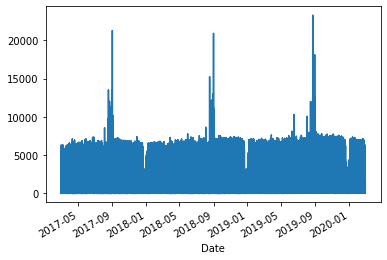

In [0]:
lakeshore_west_daily_boardings.daily_total.plot()

Q: Are those annual peaks for the CNE (Canadian National Exhibition)?

A: The peaks occur on the Saturday that precedes Labour Day in Ontario (closing day for the 2-week CNE).  Consider excluding from the analysis.

In [0]:
lakeshore_west_daily_boardings[lakeshore_west_daily_boardings.daily_total>20000]

,daily_total,Year,Month,Day,Mean Temp (°C),Total Precip (mm),Temperature Range
Date,,,,,,,
2017-09-02,21268,2017,9,2,14.8,0.0,"(-5, 15]"
2018-09-01,20896,2018,9,1,22.3,0.0,"(15, 50]"
2019-08-24,23255,2019,8,24,17.4,0.0,"(15, 50]"


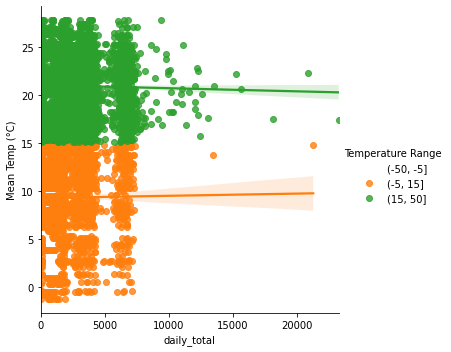

In [0]:
ax = sns.lmplot(x="daily_total", y="Mean Temp (°C)", hue="Temperature Range",
...                      data=lakeshore_west_daily_boardings_cool_weather)

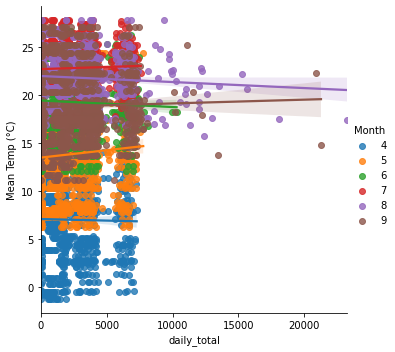

In [55]:
ax = sns.lmplot(x="daily_total", y="Mean Temp (°C)", hue="Month",
...                      data=lakeshore_west_daily_boardings_cool_weather)

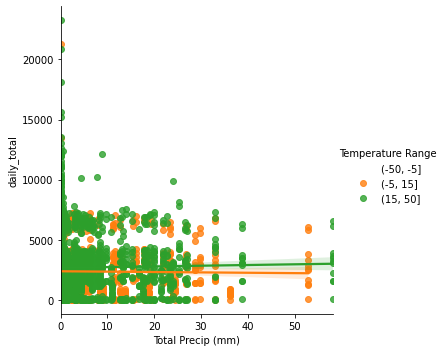

In [0]:
ax = sns.lmplot(x="Total Precip (mm)", y="daily_total", hue="Temperature Range",
...                      data=lakeshore_west_daily_boardings_cool_weather)

### Monthly Totals and Averages

In [0]:
boardings[['year_month', 'daily_total']].groupby(['year_month']).mean().plot(title='Boarding Trends: Monthly Average')

In [0]:
boardings[['year_month', 'daily_total']].groupby(['year_month']).sum().plot(title='Boarding Trends: Monthly Total')

### Weekly Totals and Averages

In [0]:
boardings[['week', 'daily_total']].groupby(['week']).sum().plot(title='Boarding Trends: Weekly Total')

In [0]:
boardings[['week', 'daily_total']].groupby(['week']).mean().plot(title='Boarding Trends: Weekly Average')